<a href="https://colab.research.google.com/github/c14250143-hub/Portofolio/blob/Data-analytic-(Riset-membaca)/Indonesia%20Reading%20Interest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140 entries, 0 to 139
Data columns (total 9 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Provinsi                                      140 non-null    object 
 1   Year                                          140 non-null    int64  
 2   Reading Frequency per week                    140 non-null    float64
 3   Number of Readings per Quarter                140 non-null    float64
 4   Daily Reading Duration (in minutes)           140 non-null    float64
 5   Internet Access Frequency per Week            105 non-null    float64
 6   Daily Internet Duration (in minutes)          105 non-null    float64
 7   Tingkat Kegemaran Membaca (Reading Interest)  140 non-null    float64
 8   Category,,,,,,                                140 non-null    object 
dtypes: float64(6), int64(1), object(2)
memory usage: 10.0+ KB
None
   

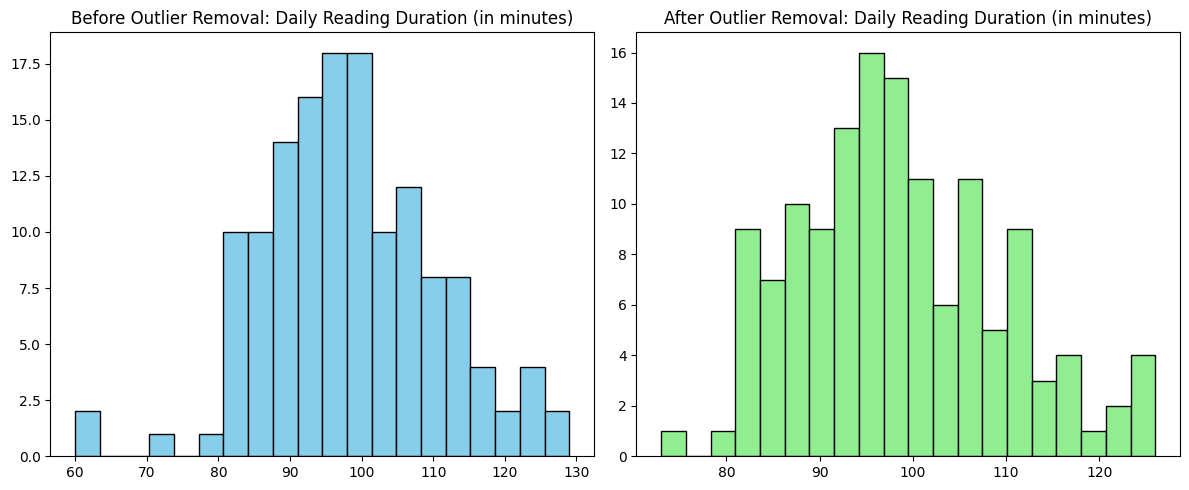

Range batas IQR untuk Daily Reading Duration (in minutes): 68.25 – 128.65
Jumlah data awal: 140, setelah bersih: 137


In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# 1. Baca dataset
df = pd.read_csv("/content/sample_data/TGM 2020-2023-eng.csv", sep=";", decimal=",")

# 2. Lihat ringkasan data
print(df.info())
print(df.describe())

# --- Fungsi untuk deteksi & hapus outlier dengan IQR ---
def remove_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    cleaned_data = data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]
    return cleaned_data, lower_bound, upper_bound

# 3. Contoh: cek outlier pada kolom Daily Reading Duration
col = "Daily Reading Duration (in minutes)"

plt.figure(figsize=(12,5))

# Histogram sebelum
plt.subplot(1,2,1)
plt.hist(df[col], bins=20, color="skyblue", edgecolor="black")
plt.title(f"Before Outlier Removal: {col}")

# Hapus outlier
df_cleaned, low, up = remove_outliers_iqr(df, col)

# Histogram sesudah
plt.subplot(1,2,2)
plt.hist(df_cleaned[col], bins=20, color="lightgreen", edgecolor="black")
plt.title(f"After Outlier Removal: {col}")

plt.tight_layout()
plt.show()

print(f"Range batas IQR untuk {col}: {low:.2f} – {up:.2f}")
print(f"Jumlah data awal: {len(df)}, setelah bersih: {len(df_cleaned)}")


In [ ]:
from google.colab import drive
drive.mount('/content/drive')